# Exercise 1

We first load a dataset and examine its dimensions.

In [2]:
# If you are running this on Google Colab, uncomment and run the following lines; otherwise ignore this cell
# from google.colab import drive
# drive.mount('/content/drive')

In [3]:
import math
import numpy as np

xy_data = np.load('Ex1_polyreg_data.npy')
# If running on Google Colab change path to '/content/drive/MyDrive/IB-Data-Science/Exercises/Ex1_polyreg_data.npy'

np.shape(xy_data)

(70, 2)

The matrix `xy_data` contains $70$ rows, each a data point of the form $(x_i,y_i)$ for $i=1, \ldots, 70$.

### 1a) Plot the data in a scatterplot.

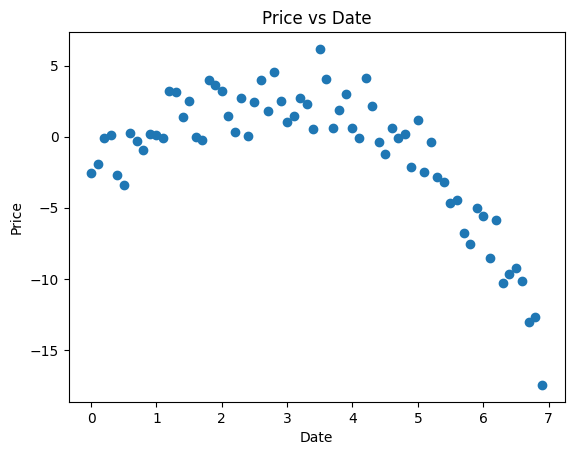

In [4]:
import matplotlib.pyplot as plt
# Your code for scatterplot here

dates = xy_data[:,0]
prices = xy_data[:,1]

plt.scatter(dates, prices)
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Price vs Date')

plt.show()


### 1b) Write a function `polyreg` to fit a polynomial of a given order to a dataset. 
The inputs to the function are a data matrix of dimension $N \times 2$,  and $k \geq 0$, the order of the polynomial.   The function should compute the coefficients of the polynomial $\beta_0 + \beta_1 x +  \ldots  +\beta_k x^{k}$ via least squares regression, and should return the coefficient vector, the fit, and the vector of residuals. 

If specified the degree $k$ is greater than or equal to $N$, then the function must fit an order $(N-1)$ polynomial and set the remaining coefficients to zero.

**NOTE**: You are *not* allowed to use the built-in function `np.polyfit`.

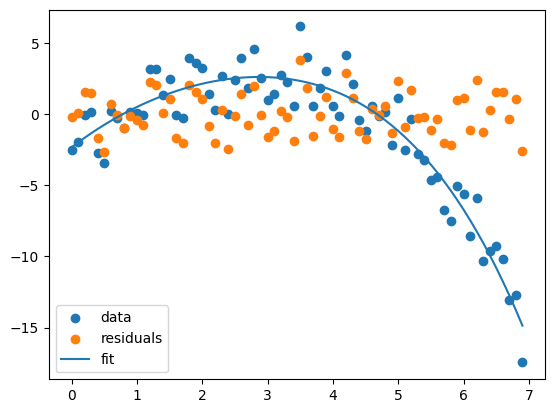

In [10]:
import numpy as np

def polyreg(data, k):
    """
    Fits a polynomial of degree k to the input data using least squares.
    
    Inputs:
    - data: N x 2 numpy array containing input-output pairs
    - k: degree of the polynomial to fit
    
    Returns:
    - beta: (k+1) x 1 numpy array containing the coefficients of the polynomial,
            starting from the constant term and going up to the k-th order term
    - fit: N x 1 numpy array containing the fitted values
    - resid: N x 1 numpy array containing the residuals
    """
    # check if degree k is valid
    if k < 0:
        raise ValueError("Degree k must be non-negative")
    
    # get number of data points
    N = np.shape(data)[0]
    
    
    # if degree k is greater than or equal to N, set it to (N-1)
    k = min(k, N-1)
    
    # set up the design matrix X
    X = np.ones((N, k+1))
    for i in range(1, k+1):
        X[:, i] = data[:, 0]**i
    
    # compute the least squares solution
    beta = np.linalg.lstsq(X, data[:, 1], rcond=None)[0]
    
    # compute the fitted values and residuals
    fit = X @ beta
    resid = data[:, 1] - fit
    
    return beta, fit, resid



beta, fit, resid = polyreg(xy_data, 4)

# plot the data and the fitted curve
plt.scatter(xy_data[:, 0], xy_data[:, 1], label='data')
plt.scatter(xy_data[:, 0], resid, label='residuals')
plt.plot(xy_data[:, 0], fit, label='fit')
plt.legend()
plt.show()

Use the tests below to check the outputs of the function you have written:

In [6]:
# Some tests to make sure your function is working correctly

xcol = np.arange(-1, 1.05, 0.1)
ycol = 2 - 7*xcol + 3*(xcol**2)  # We are generating data accoridng to y = 2 - 7x + 3x^2
test_matrix = np.transpose(np.vstack((xcol,ycol)))
test_matrix.shape

beta_test = polyreg(test_matrix, k=2)[0] 
assert((np.round(beta_test[0], 3) == 2) and (np.round(beta_test[1], 3) == -7) and (np.round(beta_test[2], 3) == 3))  
# We want to check that using the function with k=2 recovers the coefficients exactly

# Now check the zeroth order fit, i.e., the function gives the correct output with k=0
beta_test = polyreg(test_matrix, k=0)[0]
res_test = polyreg(test_matrix, k=0)[2] #the last output of the function gives the vector of residuals

assert(np.round(beta_test, 3) == 3.1)
assert(np.round(np.linalg.norm(res_test), 3) == 19.937)

### 1c) Use `polyreg` to fit polynomial models for the data in `xy_data` for $k=2,3,4$:

- Plot the fits for the three cases on the same plot together with the scatterplot of the data. The plots should be labelled and a legend included. 
- Compute and print the SSE and $R^2$ coefficient for each of the three cases.
- Which of the three models you would choose? Briefly justify your choice.

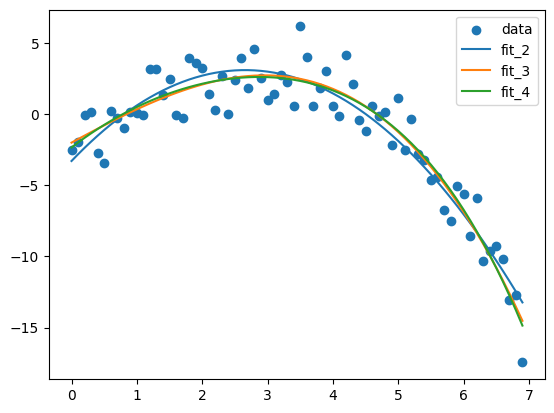

In [12]:
#Your code here

import numpy as np

def polyreg(data, k):
    """
    Fits a polynomial of degree k to the input data using least squares.
    
    Inputs:
    - data: N x 2 numpy array containing input-output pairs
    - k: degree of the polynomial to fit
    
    Returns:
    - beta: (k+1) x 1 numpy array containing the coefficients of the polynomial,
            starting from the constant term and going up to the k-th order term
    - fit: N x 1 numpy array containing the fitted values
    - resid: N x 1 numpy array containing the residuals
    """
    # check if degree k is valid
    if k < 0:
        raise ValueError("Degree k must be non-negative")
    
    # get number of data points
    N = np.shape(data)[0]
    
    
    # if degree k is greater than or equal to N, set it to (N-1)
    k = min(k, N-1)
    
    # set up the design matrix X
    X = np.ones((N, k+1))
    for i in range(1, k+1):
        X[:, i] = data[:, 0]**i
    
    # compute the least squares solution
    beta = np.linalg.lstsq(X, data[:, 1], rcond=None)[0]
    
    # compute the fitted values and residuals
    fit = X @ beta
    resid = data[:, 1] - fit
    
    return beta, fit, resid



beta_2, fit_2, resid_2 = polyreg(xy_data, 2)
beta_3, fit_3, resid_3 = polyreg(xy_data, 3)
beta_4, fit_4, resid_4 = polyreg(xy_data, 4)

# plot the data and the fitted curve
plt.scatter(xy_data[:, 0], xy_data[:, 1], label='data')
plt.plot(xy_data[:, 0], fit_2, label='fit_2')
plt.plot(xy_data[:, 0], fit_3, label='fit_3')
plt.plot(xy_data[:, 0], fit_4, label='fit_4')
plt.legend()
plt.show()


 #### State which model you choose and briefly justify your choice.
 
 Model 3 
 

 Increasing the degree of the polynomial regression may not always result in a better model. While a higher degree polynomial can potentially fit the data more closely, it can also lead to overfitting, where the model fits the noise in the data rather than the underlying pattern. This can result in poor performance on new data.

In general, the degree of the polynomial should be chosen based on a balance between the model's complexity and its ability to capture the underlying pattern in the data. A good way to determine the optimal degree of the polynomial is to use cross-validation techniques, where the data is split into training and testing sets, and the performance of the model is evaluated on the testing set. The degree of the polynomial that produces the best performance on the testing set can then be selected.

In summary, a higher degree polynomial regression may not always be better, and the optimal degree should be chosen based on the balance between the model's complexity and its ability to capture the underlying pattern in the data.

 

### 1d)  For the model you have chosen in the previous part (either $k=2/3/4)$:

- Plot the residuals in a scatter plot. 
- Plot a histogram of the residuals along with a Gaussian pdf with zero mean and the same standard deviation as the residuals.

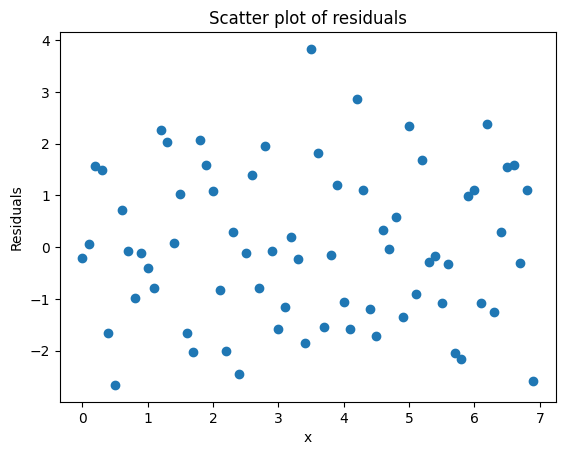

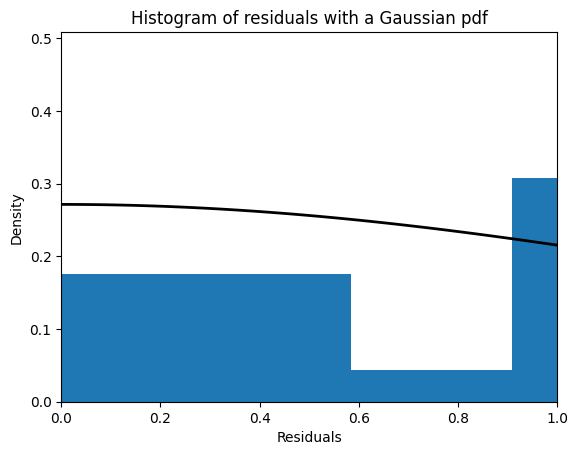

In [9]:
#Your code here
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np

# Plot residuals
beta, fit, resid = polyreg(xy_data, 4)
plt.scatter(xy_data[:, 0], resid)
plt.xlabel('x')
plt.ylabel('Residuals')
plt.title('Scatter plot of residuals')
plt.show()

# Plot histogram of residuals with a Gaussian pdf
mean = np.mean(resid)
std = np.std(resid)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mean, std)
plt.hist(resid, density=True, bins=20)
plt.plot(x, p, 'k', linewidth=2)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Histogram of residuals with a Gaussian pdf')
plt.xlim(xmin, xmax)
plt.show()
